# Exercise 4: recommender System

In [1]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


## Code from the lecture

In [13]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(path+'/DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(path+'/DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(path+'/DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [28]:
def getTopN(movie_id,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [29]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

Cosine Distance: [[0.         0.40238218 0.33024479 ... 0.         0.04718307 0.04718307]
 [0.40238218 0.         0.27306918 ... 0.         0.07829936 0.07829936]
 [0.33024479 0.27306918 0.         ... 0.         0.         0.09687505]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.09687505 ... 0.         0.         0.        ]]
Euclidean Distance: [[ 0.         76.72387021 79.07496488 ... 83.79976415 83.68766144
  83.68766144]
 [76.72387021  0.         41.17819342 ... 37.36665219 37.19685851
  37.19685851]
 [79.07496488 41.17819342  0.         ... 30.0322413  30.11269837
  29.82207001]
 ...
 [83.79976415 37.36665219 30.0322413  ...  0.          2.60555128
   2.60555128]
 [83.68766144 37.19685851 30.11269837 ...  2.60555128  0.
   3.24264069]
 [83.68766144 37.19685851 29.82207001 ...  2.60555128  3.24264069
   0.        ]]
Pearson Correlation: [[0.         0

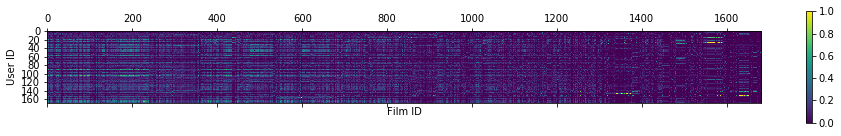

In [41]:
import scipy.spatial

# Cosine
D=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='cosine'))
D=np.abs(np.nan_to_num( D-1)) #dist to similarity 
np.fill_diagonal(D,0) #set self-dist to zero

#Euclodean

D2=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='euclidean'))
D2=np.abs(np.nan_to_num( D2-1)) #dist to similarity 
np.fill_diagonal(D2,0) #set self-dist to zero


D3=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='correlation'))
D3=np.abs(np.nan_to_num( D3-1)) #dist to similarity 
np.fill_diagonal(D3,0) #set self-dist to zero

#Pearson Correlation
print("Cosine Distance:", D)
print("Euclidean Distance:", D2)
print("Pearson Correlation:", D3)


#Compare in Plot !!!!

#Split Data -> train_test_split(R, test_size=0.1) -> Use Def Test Score



## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $R$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct R and evaluate $R'$
* compute the distance between two movies using $R'$


In [35]:
def getTopN2(movie_id,N=5):
    return D2[movie_id,:].argsort()[-N:]

def getIDbyName2(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID2(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII2(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID2(ID, D2, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D2)[::-1]
    res_title = getNameByID(getTopN(ID,D2))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score2(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [36]:
CII("star")

recommending movies for: 'Bastard Out of Carolina (1996)'


1003    Geronimo: An American Legend (1993)
1168                           Fresh (1994)
1507                 Babysitter, The (1995)
1521                   Trial by Jury (1994)
692                           Casino (1995)
Name: title, dtype: object

In [37]:
CII2("star")

recommending movies for: 'Bastard Out of Carolina (1996)'


1003    Geronimo: An American Legend (1993)
1168                           Fresh (1994)
1507                 Babysitter, The (1995)
1521                   Trial by Jury (1994)
692                           Casino (1995)
Name: title, dtype: object